In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
from scipy.integrate import cumtrapz
from matmodlab2 import *

Populating the interactive namespace from numpy and matplotlib
Setting up the Matmodlab notebook environment


In [2]:
def strain_components(a, t):
    # Returns xx, yy, xy components of strain given by eqn 38 
    x = array([cos(pi * t / 2.) ** 2,
               sin(pi * t / 2.) ** 2,
               sin(pi * t) / 2.])
    return a * t * x
    
def strain_rate_components(a, t):
    # Returns xx, yy, xy components of strain rate given by eqn 42
    x = array([1 + cos(pi * t) - pi * t * sin(pi * t),
               1 - cos(pi * t) + pi * t * sin(pi * t),
               pi * t * cos(pi * t) + sin(pi * t)])
    return a * x / 2.

def rate_of_deformation_components(a, t):
    # Returns xx, yy, xy components of rate of deformation given by eqn 44
    x = array([a + a * cos(pi * t) - pi * sin(pi * t) * sinh(a * t),
               a - a * cos(pi * t) + pi * sin(pi * t) * sinh(a * t),
               a * sin(pi * t) + pi * cos(pi * t) * sinh(a * t)])
    return x / 2.

In [3]:
a = .5
tf = 2.
N = 1000
d = zeros((N, 3))
eps = zeros((N, 3))
depsdt = zeros((N, 3))

time = linspace(0, tf, N)
for (i, t) in enumerate(time):
    eps[i] = strain_components(a, t)
    depsdt[i] = strain_rate_components(a, t)
    d[i] = rate_of_deformation_components(a, t)
int_d = row_stack(([0, 0, 0], cumtrapz(d, x=time, axis=0)))

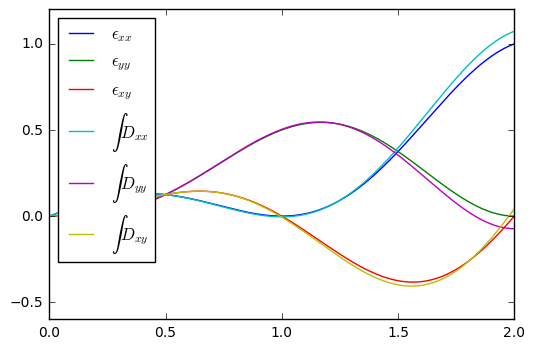

In [4]:
for (i, label) in enumerate(['xx', 'yy', 'xy']):
    plot(time, eps[:, i], label=r'$\epsilon_{%s}$'%label)
for (i, label) in enumerate(['xx', 'yy', 'xy']):
    plot(time, int_d[:, i], label=r'$\int D_{%s}$'%label)
legend(loc='upper left');

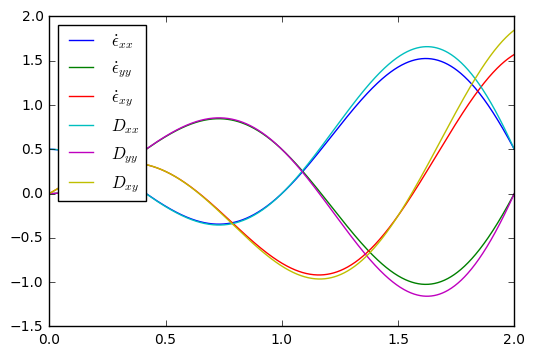

In [5]:
for (i, label) in enumerate(['xx', 'yy', 'xy']):
    plot(time, depsdt[:, i], label=r'$\dot{\epsilon}_{%s}$'%label)
for (i, label) in enumerate(['xx', 'yy', 'xy']):
    plot(time, d[:, i], label=r'$D_{%s}$'%label)
legend(loc='upper left');